<a href="https://colab.research.google.com/github/Ductrinh01/hand_tracking/blob/main/hand_tracking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import random
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, MaxPooling2D, Flatten, LeakyReLU, Convolution2D, MaxPool2D

In [3]:
x_data = np.zeros((600,250,250,3))
for i in range(600):
  x_data[i] = load_img('/content/drive/MyDrive/AI/image/'+str(i+27) +'.jpg', target_size=(250, 250))
  x_data[i] = img_to_array(x_data[i])
x_data /= 255
x_data.shape

(600, 250, 250, 3)

In [4]:
y_data = pd.read_csv('/content/drive/MyDrive/AI/data_resize.csv')
y_data.head(None)

,1,2,3,4,5,6,7,8,9,10,...,33,34,35,36,37,38,39,40,41,42
0,143.750000,179.166667,126.171875,164.583333,114.843750,143.750000,109.375000,124.479167,104.296875,109.375000,...,175.781250,67.708333,167.187500,131.770833,178.125000,118.229167,184.375000,109.895833,190.234375,102.083333
1,143.359375,179.166667,126.171875,164.583333,114.453125,143.750000,108.593750,125.000000,103.906250,110.416667,...,175.781250,68.750000,166.406250,131.770833,177.343750,118.750000,183.984375,110.937500,189.843750,102.604167
2,139.062500,182.291667,121.875000,168.750000,109.765625,147.395833,103.906250,128.125000,98.437500,113.541667,...,171.875000,69.791667,162.500000,134.375000,173.828125,121.354167,180.859375,113.020833,187.109375,104.166667
3,137.109375,184.375000,119.921875,170.312500,107.812500,148.958333,101.953125,129.687500,96.875000,115.625000,...,171.484375,70.833333,161.328125,135.937500,173.046875,122.395833,180.078125,114.062500,185.546875,105.729167
4,132.812500,192.187500,114.843750,178.125000,101.953125,156.770833,95.312500,137.500000,88.671875,123.437500,...,168.750000,75.000000,157.812500,142.708333,169.921875,128.645833,177.734375,120.312500,184.375000,110.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,128.906250,179.166667,111.328125,171.875000,97.656250,156.770833,88.671875,142.187500,80.859375,130.729167,...,142.578125,71.875000,141.796875,130.729167,150.781250,119.270833,157.421875,111.979167,162.890625,104.166667
596,129.296875,179.166667,111.718750,172.395833,98.437500,157.291667,89.062500,142.708333,80.859375,131.250000,...,142.968750,72.395833,141.796875,130.729167,150.781250,119.270833,157.421875,111.458333,163.281250,104.166667
597,129.687500,179.687500,112.109375,172.395833,98.437500,157.291667,89.062500,142.708333,81.250000,131.250000,...,142.968750,72.395833,142.187500,131.250000,151.171875,119.270833,157.421875,111.979167,163.281250,104.166667
598,131.640625,181.770833,114.843750,176.041667,101.562500,160.937500,92.187500,146.354167,84.375000,135.937500,...,142.968750,74.479167,142.578125,132.812500,151.562500,120.833333,157.421875,113.020833,162.890625,105.208333


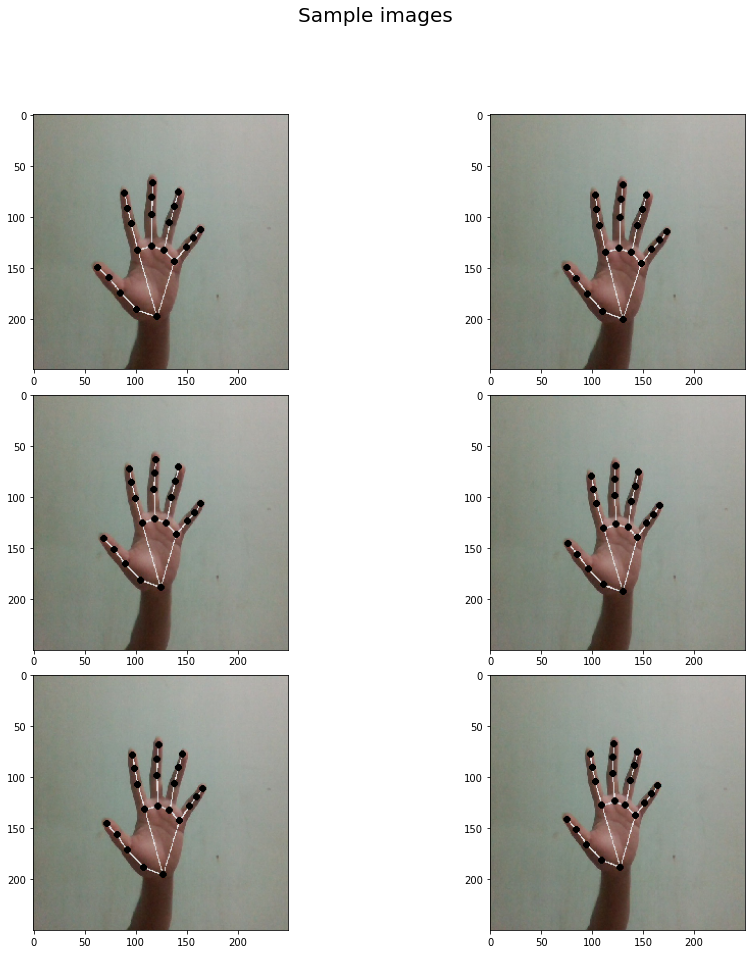

In [5]:
plt.figure(figsize = (15, 15))
plt.subplots_adjust(hspace = .1)
for i in range(6):
    plt.subplot(3, 2, i + 1)
    k = random.randint(0, 499)
    img = x_data[k]
    points = list(y_data.iloc[k])
    points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
    for x, y in points:
        cv2.circle(img, (int(x), int(y)), 2, (0, 0, 0), 2)
    plt.imshow(img,cmap='gray')
_ = plt.suptitle('Sample images', size = 20)

In [6]:
input_shape = x_data.shape[1:3]
y_data = np.array(y_data, dtype = 'float')
num_class = y_data.shape[1]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.1)
print('Input shape: ', input_shape)
print('Number of output: ', num_class)
print('x train shape: ', x_train.shape)
print('y train shape: ', y_train.shape)
print('x test shape: ', x_test.shape)
print('y test shape: ', y_test.shape)

Input shape:  (250, 250)
Number of output:  42
x train shape:  (540, 250, 250, 3)
y train shape:  (540, 42)
x test shape:  (60, 250, 250, 3)
y test shape:  (60, 42)


In [7]:
model = Sequential()

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(250,250,3)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
# model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(num_class))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 32)      864       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 250, 250, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 250, 250, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      9216      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 250, 250, 32)      0         
                                                                 
 batch_normalization_1 (Batc  (None, 250, 250, 32)     128       
 hNormalization)                                        

In [8]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer = 'Adam',loss = "mean_squared_error",metrics = ['mae'])

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor = 'val_mae', patience = 25)
hist = model.fit(x_train, y_train, epochs = 50, batch_size = 16, validation_split = 0.1).history

Epoch 1/50
31/31 [==============================] - 19s 163ms/step - loss: 1573.7719 - mae: 25.9906 - val_loss: 16371.4775 - val_mae: 122.4586
Epoch 2/50
31/31 [==============================] - 3s 107ms/step - loss: 184.2848 - mae: 10.7683 - val_loss: 15671.7617 - val_mae: 120.5989
Epoch 3/50
31/31 [==============================] - 3s 107ms/step - loss: 133.7919 - mae: 9.1922 - val_loss: 14628.2568 - val_mae: 116.5268
Epoch 4/50
31/31 [==============================] - 3s 108ms/step - loss: 118.9890 - mae: 8.7107 - val_loss: 13528.2920 - val_mae: 111.8137
Epoch 5/50
31/31 [==============================] - 3s 108ms/step - loss: 112.3136 - mae: 8.4348 - val_loss: 12536.9746 - val_mae: 107.3197
Epoch 6/50
31/31 [==============================] - 3s 108ms/step - loss: 115.2405 - mae: 8.5499 - val_loss: 11592.1318 - val_mae: 103.0205
Epoch 7/50
31/31 [==============================] - 3s 108ms/step - loss: 96.0434 - mae: 7.7610 - val_loss: 10908.8252 - val_mae: 99.7870
Epoch 8/50
31/31 [

In [10]:
val_loss, val_mae = model.evaluate(x_test, y_test)
print('val loss: {:.4f}'.format(val_loss))
print('val accuracy: {:.4f}'.format(val_mae))

2/2 [==============================] - 3s 1s/step - loss: 100.7977 - mae: 9.3437
val loss: 100.7977
val accuracy: 9.3437


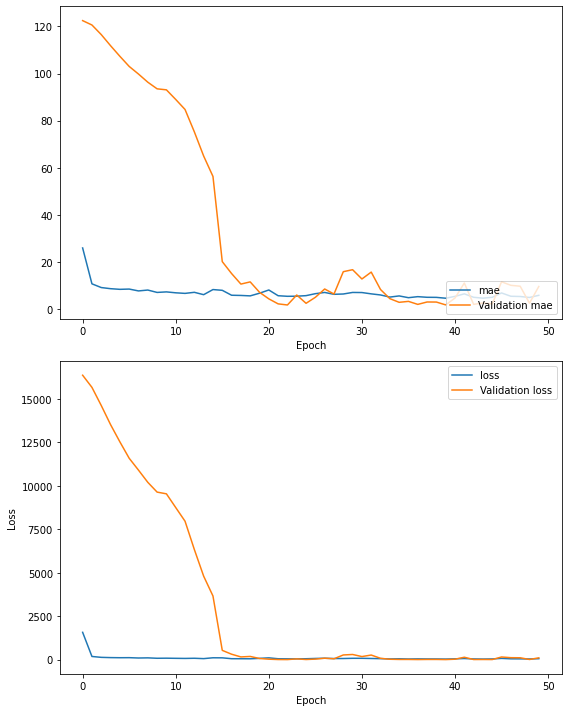

In [11]:
model_history = pd.DataFrame(hist)
model_history['epoch'] = np.arange(1, len(model_history) + 1)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (8, 10))
epochs = model_history.shape[0]
ax1.plot(np.arange(0, epochs), model_history['mae'], label = 'mae')
ax1.plot(np.arange(0, epochs), model_history['val_mae'], label = 'Validation mae')
ax1.legend(loc = 'lower right')
ax1.set_xlabel('Epoch')
ax2.plot(np.arange(0, epochs), model_history['loss'], label = 'loss')
ax2.plot(np.arange(0, epochs), model_history['val_loss'], label = 'Validation loss')
ax2.legend(loc = 'upper right')
ax2.set_ylabel('Loss')
ax2.set_xlabel('Epoch')
plt.tight_layout()
plt.show()

In [12]:
PATH = '/content/drive/MyDrive/AI/'
MODEL_NAME = "Model_MAE" + str(round(val_mae)) + ".h5"
model.save(PATH + MODEL_NAME)
print(MODEL_NAME)

Model_MAE9.h5


In [13]:
from keras.models import load_model
#model = load_model(PATH + 'Model_MAE42.h5')
model = load_model(PATH + MODEL_NAME)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


22
[139.67873  204.93105  121.148964 196.77693  104.20019  180.01155
  95.23875  164.26697   86.16761  150.89978  121.614624 139.13795
 112.980995 112.005135 110.101295  97.30697  108.09546   83.50483
 135.56978  134.60144  132.99255  105.46934  133.30661   88.1842
 134.21805   73.91135  145.12775  140.12045  151.07983  112.63071
 153.27806   96.32135  158.3836    81.26766  155.22562  149.97034
 164.56213  135.47473  174.4067   127.32018  179.85098  118.57841 ]


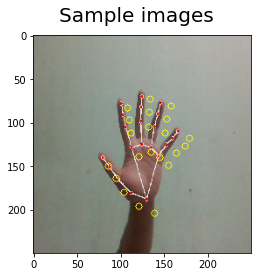

In [17]:
pred = model.predict(x_test)
n = x_test.shape[0]

k = random.randint(0, 49)
print(k)
img = x_test[k].reshape(250,250,3)
points = pred[k,:]
#points = [tuple(points[i : i + 2]) for i in range(0, len(points), 2)]
print(points)
for j in range(21):
  cv2.circle(img, (int(points[j*2]), int(points[j*2+1])), 4, (255, 255, 0), 1)
plt.imshow(img)
_ = plt.suptitle('Sample images', size = 20)